In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Get the IRIS dataset
url = "/content/drive/MyDrive/Colab Notebooks/Iris.csv"
data = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])
 
data

,sepal length,sepal width,petal length,petal width,target
Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
...,...,...,...,...,...
146,6.7,3.0,5.2,2.3,Iris-virginica
147,6.3,2.5,5.0,1.9,Iris-virginica
148,6.5,3.0,5.2,2.0,Iris-virginica
149,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
#prepare the data
x = data.iloc[1:,0:4]
x

,sepal length,sepal width,petal length,petal width
1,5.1,3.5,1.4,0.2
2,4.9,3.0,1.4,0.2
3,4.7,3.2,1.3,0.2
4,4.6,3.1,1.5,0.2
5,5.0,3.6,1.4,0.2
...,...,...,...,...
146,6.7,3.0,5.2,2.3
147,6.3,2.5,5.0,1.9
148,6.5,3.0,5.2,2.0
149,6.2,3.4,5.4,2.3


In [5]:
#prepare the target
target = data.iloc[1:,4]
target

1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
5         Iris-setosa
            ...      
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
150    Iris-virginica
Name: target, Length: 150, dtype: object

In [6]:
# Singular-value decomposition

from numpy import array
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=2)
svd.fit(x)
result = svd.transform(x)
result


array([[ 5.91220352e+00,  2.30344211e+00],
       [ 5.57207573e+00,  1.97383104e+00],
       [ 5.44648470e+00,  2.09653267e+00],
       [ 5.43601924e+00,  1.87168085e+00],
       [ 5.87506555e+00,  2.32934799e+00],
       [ 6.47699043e+00,  2.32552598e+00],
       [ 5.51542859e+00,  2.07156181e+00],
       [ 5.85042297e+00,  2.14948016e+00],
       [ 5.15851287e+00,  1.77642658e+00],
       [ 5.64458172e+00,  1.99190598e+00],
       [ 6.26482670e+00,  2.42727947e+00],
       [ 5.75150446e+00,  2.02142409e+00],
       [ 5.48017099e+00,  1.97972378e+00],
       [ 4.95064168e+00,  2.04947793e+00],
       [ 6.52528515e+00,  2.91774840e+00],
       [ 6.78960484e+00,  2.82549990e+00],
       [ 6.27173006e+00,  2.60908548e+00],
       [ 5.92899145e+00,  2.26896626e+00],
       [ 6.64757408e+00,  2.39126214e+00],
       [ 6.09424306e+00,  2.36154331e+00],
       [ 6.25352038e+00,  2.12203279e+00],
       [ 6.07305216e+00,  2.27257849e+00],
       [ 5.36933796e+00,  2.49857510e+00],
       [ 6.

In [7]:
#Creating a Pandas DataFrame of reduced Dataset
principal_df = pd.DataFrame(result , columns = ['PC1','PC2'])
principal_df 
target.reset_index(drop=True, inplace=True)
#Concat it with target variable to create a complete Dataset
principal_df = pd.concat([principal_df , pd.DataFrame(target)] , axis = 1)
principal_df

,PC1,PC2,target
0,5.912204,2.303442,Iris-setosa
1,5.572076,1.973831,Iris-setosa
2,5.446485,2.096533,Iris-setosa
3,5.436019,1.871681,Iris-setosa
4,5.875066,2.329348,Iris-setosa
...,...,...,...
145,9.226698,-0.929481,Iris-virginica
146,8.566555,-1.036575,Iris-virginica
147,9.026101,-0.883220,Iris-virginica
148,9.105660,-0.996221,Iris-virginica


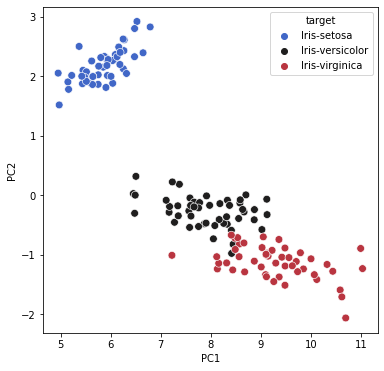

In [8]:
plt.figure(figsize = (6,6))
sb.scatterplot(data = principal_df , x = 'PC1',y = 'PC2' , hue = 'target' , s = 60 , palette= 'icefire')

In [9]:
X = principal_df.drop(columns=["target"])
y = principal_df["target"]

In [10]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=1).fit(X)

In [11]:
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2], dtype=int32)

In [12]:
pred = kmeans.predict(X)

In [13]:
hasil = kmeans.transform(X)

In [14]:
hasil

array([[5.03072092, 0.14571357, 3.41169309],
       [5.07720085, 0.34151925, 3.38383559],
       [5.2516119 , 0.41106159, 3.55939442],
       [5.12528989, 0.51161231, 3.41117313],
       [5.07555954, 0.15986475, 3.4546995 ],
       [4.64967163, 0.64500731, 3.12637672],
       [5.18188996, 0.34978798, 3.49325121],
       [4.9734556 , 0.02187549, 3.32830193],
       [5.30019235, 0.79690798, 3.5610101 ],
       [5.03112552, 0.27327259, 3.34626984],
       [4.86823689, 0.48684262, 3.31917025],
       [4.96626475, 0.17976289, 3.29531521],
       [5.15386675, 0.41713151, 3.45323912],
       [5.62477221, 0.90825203, 3.89430282],
       [5.07516   , 1.00608015, 3.63989187],
       [4.84431054, 1.14432845, 3.45753492],
       [4.99781719, 0.60736509, 3.47357585],
       [4.99496238, 0.12514351, 3.3740318 ],
       [4.58723885, 0.82668047, 3.10906388],
       [4.93986458, 0.30902291, 3.35420482],
       [4.6583522 , 0.40584902, 3.06656873],
       [4.89272744, 0.24432765, 3.29258179],
       [5.

In [15]:
pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2], dtype=int32)

In [16]:
X["target"] = pred
X

,PC1,PC2,target
0,5.912204,2.303442,1
1,5.572076,1.973831,1
2,5.446485,2.096533,1
3,5.436019,1.871681,1
4,5.875066,2.329348,1
...,...,...,...
145,9.226698,-0.929481,0
146,8.566555,-1.036575,2
147,9.026101,-0.883220,0
148,9.105660,-0.996221,0


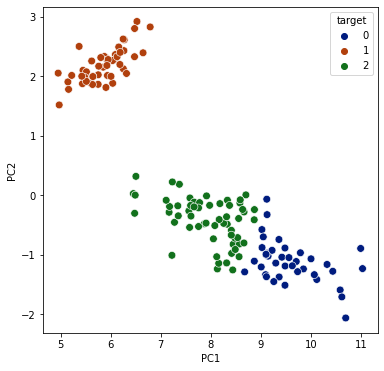

In [17]:
#HASIL CLUSTERING PCA-EVD + K-MEANS
plt.figure(figsize = (6,6))
sb.scatterplot(data = X , x = 'PC1',y = 'PC2' , hue = 'target' , s = 60 , palette= 'dark')

# PERTANYAAN
Apakah hasil clustering-nya tepat?
---
Hasil clustering tergolong cukup tepat karena hampir semua data memiliki kelompok yang benar. Ada beberapa data yang memiliki kelompok yang salah.


---
PCA-svd


---
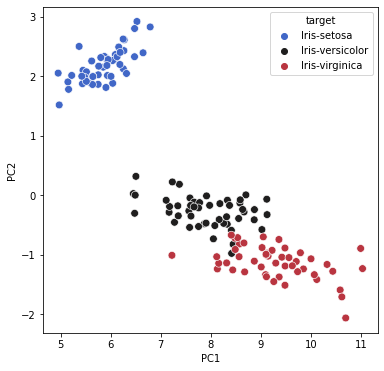


---
PCA-svd + K-Means


---
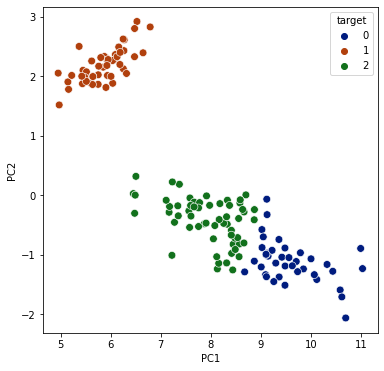


---
Perbedaan


---
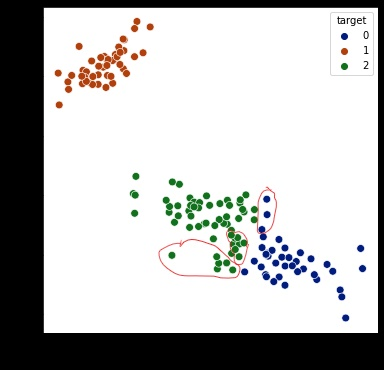







